In [550]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [551]:
data = "/Users/livinundershadows/Desktop/Notebooks/top50.csv"
columns = ["BPM", "Energy", "Danceability", "Loudness", "Liveness", "Valence", "Length", "Acousticness", "Speechiness"]
targetc = ["Popularity"]
packet1 = pd.read_csv(data, encoding="ISO-8859-1", usecols = columns)
packet2 = pd.read_csv(data, encoding="ISO-8859-1", usecols = targetc)

x_train, x_test, y_train, y_test = train_test_split(packet1, packet2, test_size = 0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(35, 9) (15, 9) (35, 1) (15, 1)


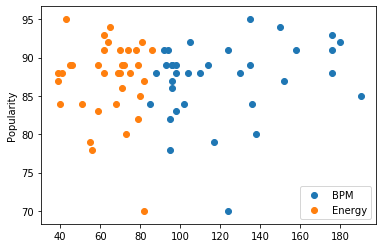

In [552]:

# lets try plotting data
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x_train["BPM"], y_train, label="BPM")
ax1.scatter(x_train["Energy"], y_train, label="Energy")
plt.legend(loc='lower right');
plt.ylabel("Popularity")
plt.show()


In [553]:
#some presets and data conversion
# batch size = number of examples
N, D_in, H, D_out = 35, 9, 200, 1

x = x_train.to_numpy()
y_temp = np.empty([35,1], dtype=float)
for i in range(35):
    y = y_train.to_numpy()
    y = y / 100
y_temp = y
x = torch.tensor(x, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

print(x.shape, y.shape)

torch.Size([35, 9]) torch.Size([35, 1])


In [554]:
class baseline(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(baseline, self).__init__()
        self.l1 = torch.nn.Linear(D_in, H)
        self.l2 = torch.nn.Linear(H, D_out)
    def forward(self, x):
        x = self.l1(x)
        x = torch.sigmoid(x)
        y_pred = self.l2(x)
        return y_pred
    
model = baseline(D_in, H, D_out)

In [555]:
criterion = torch.nn.MSELoss(reduction='sum') 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
epochs = 1000
#losses = np.empty([10], dtype=float) #implement a loss metric to plot the loss 
for t in range(epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 1:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
#print(losses)

1 10.78947925567627
101 0.25577598810195923
201 0.15009687840938568
301 0.08254533261060715
401 0.041672009974718094
501 0.019843824207782745
601 0.007225860375910997
701 0.003973287530243397
801 0.0022051711566746235
901 0.0012277328642085195


torch.Size([35, 1])


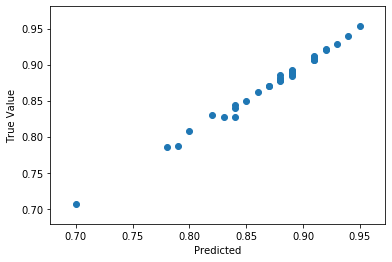

In [556]:
print(y_pred.shape)
y_pred1 = y_pred.detach().numpy()
plt.scatter(y_temp, y_pred1)
plt.xlabel("Predicted")
plt.ylabel("True Value")
plt.show()

In [557]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_temp, y_pred1)))

Root Mean Squared Error: 0.004072545038762937


In [558]:
# lets test our model on a test dataset
x_t = x_test.to_numpy()
y_temp2 = np.empty([15,1], dtype=float)
for i in range(15):
    y_t = y_test.to_numpy()
    y_t = y_t / 100
    y_temp2 = y_t
x_t = torch.tensor(x_t, dtype=torch.float)
y_t = torch.tensor(y_t, dtype=torch.float)

print(x_t.shape, y_t.shape)

torch.Size([15, 9]) torch.Size([15, 1])


In [559]:
# testing the model
y_p1 = model(x_t)
y_p2 = y_p1.detach().numpy()

In [560]:
y_t2 = y_t.detach().numpy()

In [561]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_t2,y_p2)))

Root Mean Squared Error: 0.0805937
